In [15]:
import numpy as np
from scipy.stats import sobol_indices, uniform
rng = np.random.default_rng()
def f_eq1(x):
    # x[0] = k, or discharge coefficient
    # x[1] = gamma_g, geometric porosity
    # x[2] = c_e, effective porosity
    f_eval = (
        x[0] * x[1]
        + (1 - x[1]) * x[2]
    )
    return f_eval
indices = sobol_indices(
    func=f_eq1, n=2**14,
    dists=[
        uniform(loc= 0, scale= 1.5),
        uniform(loc= 0, scale=1),
        uniform(loc= 0, scale=1)
    ],
    random_state=rng
)
print("first order" , indices.first_order)
print("total order", indices.total_order)

first order [0.49086421 0.05453075 0.21812235]
total order [0.65454586 0.29091005 0.29090914]


In [16]:
boot = indices.bootstrap()

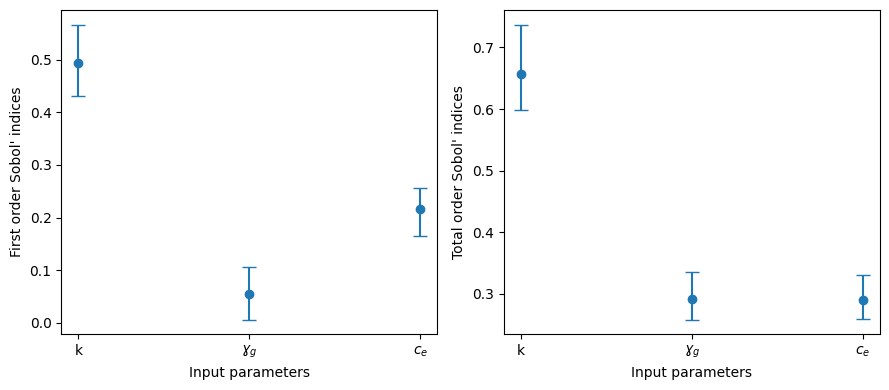

In [14]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
_ = axs[0].errorbar(
    ['k', '$ɣ_g$', '$c_e$'], indices.first_order, fmt='o',
    yerr=[
        indices.first_order - boot.first_order.confidence_interval.low,
        boot.first_order.confidence_interval.high - indices.first_order
    ], capsize = 5,
    
)
axs[0].set_ylabel("First order Sobol' indices")
axs[0].set_xlabel('Input parameters')
axs[0].set_xticks(['k', '$ɣ_g$', '$c_e$'])
_ = axs[1].errorbar(
    ['k', '$ɣ_g$', '$c_e$'], indices.total_order, fmt='o',
    yerr=[
        indices.total_order - boot.total_order.confidence_interval.low,
        boot.total_order.confidence_interval.high - indices.total_order
    ], capsize = 5,
)
axs[1].set_ylabel("Total order Sobol' indices")
axs[1].set_xlabel('Input parameters')
axs[1].set_xticks(['k', '$ɣ_g$', '$c_e$'])
plt.tight_layout()
plt.show()

In [6]:
from scipy.stats import qmc
n_dim = 3
p_labels = ['k', '$ɣ_g$', '$c_e$']
sample = qmc.Sobol(d=n_dim, seed=rng).random(1024)
sample = qmc.scale(
    sample=sample,
    l_bounds=[0, 0, 0],
    u_bounds=[1.5, 1, 1]
)
output = f_eq1(sample.T)

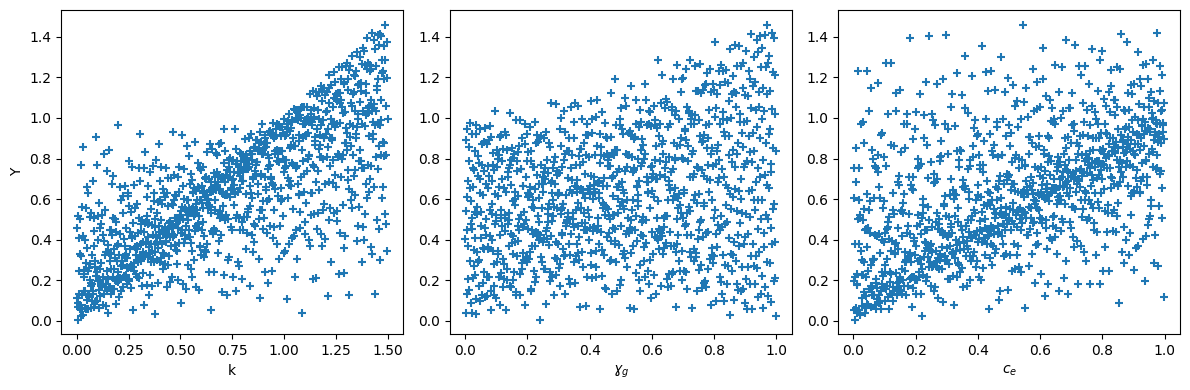

In [7]:
fig, ax = plt.subplots(1, n_dim, figsize=(12, 4))
for i in range(n_dim):
    xi = sample[:, i]
    ax[i].scatter(xi, output, marker='+')
    ax[i].set_xlabel(p_labels[i])
ax[0].set_ylabel('Y')
plt.tight_layout()
plt.show()

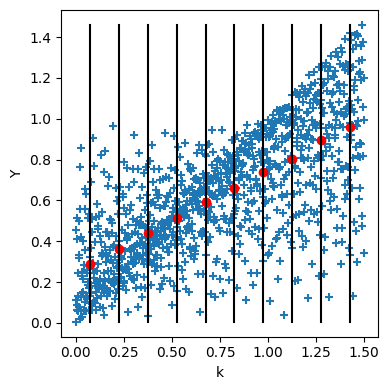

In [11]:
mini = np.min(output)
maxi = np.max(output)
n_bins = 10
bins = np.linspace(0, 1.5, num=n_bins, endpoint=False)
dx = bins[1] - bins[0]
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
xi = sample[:, 0]
ax.scatter(xi, output, marker='+')
ax.set_xlabel(p_labels[0])
for bin_ in bins:
    idx = np.where((bin_ <= xi) & (xi <= bin_ + dx))
    xi_ = xi[idx]
    y_ = output[idx]
    ave_y_ = np.mean(y_)
    ax.plot([bin_ + dx/2] * 2, [mini, maxi], c='k')
    ax.scatter(bin_ + dx/2, ave_y_, c='r')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

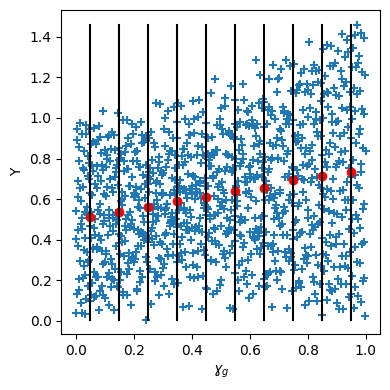

In [9]:
mini = np.min(output)
maxi = np.max(output)
n_bins = 10
bins = np.linspace(0, 1, num=n_bins, endpoint=False)
dx = bins[1] - bins[0]
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
xi = sample[:, 1]
ax.scatter(xi, output, marker='+')
ax.set_xlabel(p_labels[1])
for bin_ in bins:
    idx = np.where((bin_ <= xi) & (xi <= bin_ + dx))
    xi_ = xi[idx]
    y_ = output[idx]
    ave_y_ = np.mean(y_)
    ax.plot([bin_ + dx/2] * 2, [mini, maxi], c='k')
    ax.scatter(bin_ + dx/2, ave_y_, c='r')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

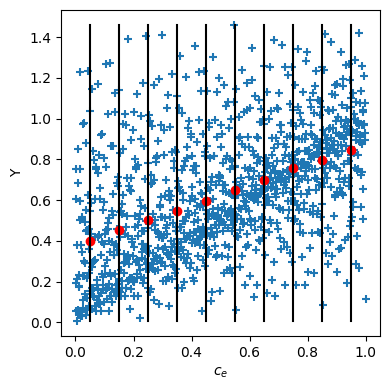

In [10]:
mini = np.min(output)
maxi = np.max(output)
n_bins = 10
bins = np.linspace(0, 1, num=n_bins, endpoint=False)
dx = bins[1] - bins[0]
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
xi = sample[:, 2]
ax.scatter(xi, output, marker='+')
ax.set_xlabel(p_labels[2])
for bin_ in bins:
    idx = np.where((bin_ <= xi) & (xi <= bin_ + dx))
    xi_ = xi[idx]
    y_ = output[idx]
    ave_y_ = np.mean(y_)
    ax.plot([bin_ + dx/2] * 2, [mini, maxi], c='k')
    ax.scatter(bin_ + dx/2, ave_y_, c='r')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()